# Aggie Sports Analytics x Girls Who Code Workshop

Welcome to our workshop! The main goal of our workshop is to introduce you to the world of sports analytics and data science. We will be using Python and Jupyter Notebooks to analyze data and create visualizations.

The main datasets we'll be using come from the 2023 NFL Data Bowl. The NFL Data Bowl is a competition where data scientists and sports analysts compete to create the best models and visualizations to predict the outcome of NFL games. Though we aren't competing in the competetion, they provide nice, cleaned datasets for us to use. These datasets cover a wide range of statistics and information about NFL games and players.

# Setup

### These are the libraries we will use in our code. We need to import all of them. Additionally, we need to convert all of our data into code friendly format, pandas dataframes!

In [39]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

# Read CSVs
games_df = pd.read_csv('data/games.csv')
players_df = pd.read_csv('data/players.csv')
plays_df = pd.read_csv('data/plays.csv')
tackles_df = pd.read_csv('data/tackles.csv')

# Games

### Often times, the performance of NFL teams changes drastically depending on if they are playing in their own stadium or not. Players have cited the home crowd cheering them on as a reason for their improved performance. This is known as the home field advantage. At away games, players are often distracted with the chants and boos of a crowd. As a general rule of thumb, the home team is more favored to win than the away team. However, there are some exceptions to this rule. Some NFL players and teams perform better under pressure, and have better results away. Which teams are these? Let's find out.

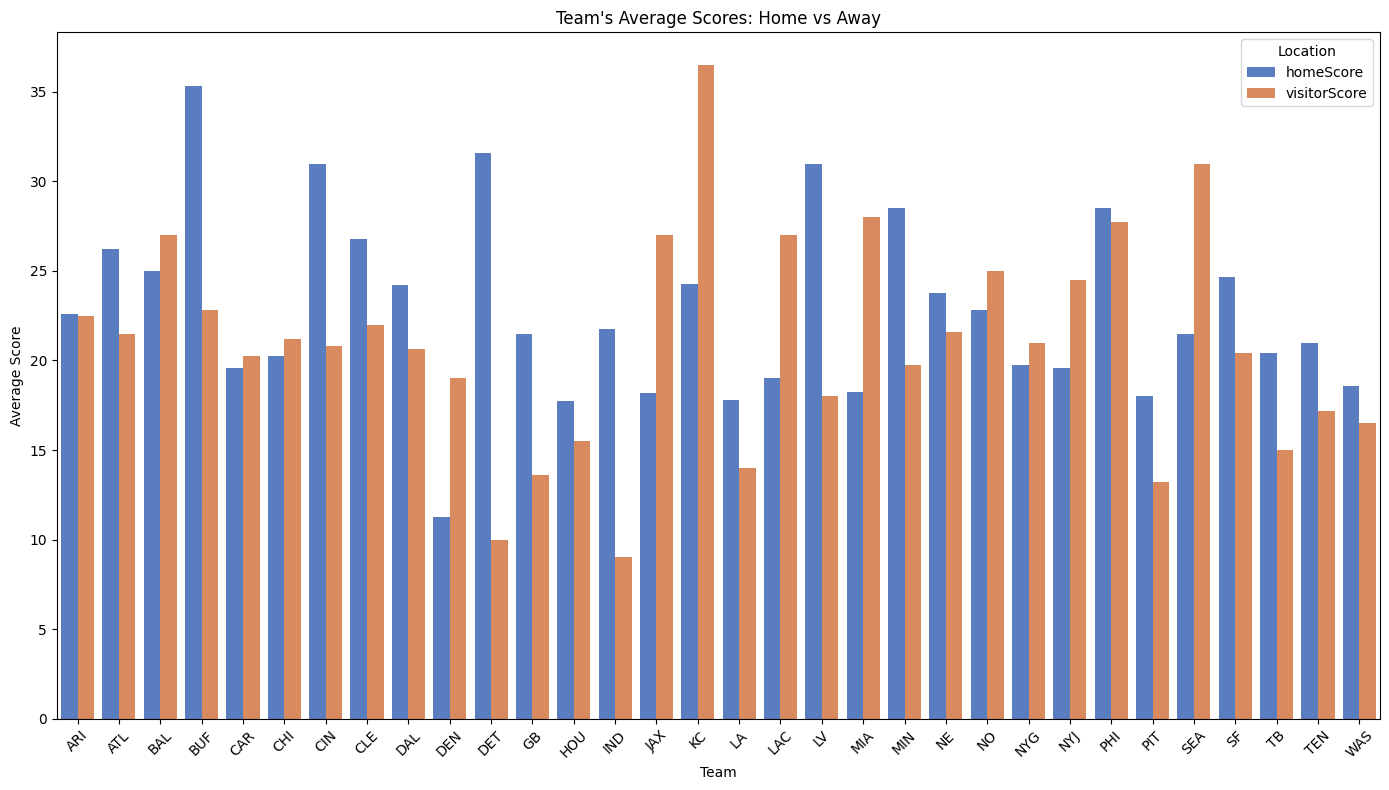

In [21]:
# Calculate the average home score for each team
home_scores = games_df.groupby('homeTeamAbbr')['homeFinalScore'].mean().reset_index()

# Calculate the average visitor score for each team
visitor_scores = games_df.groupby('visitorTeamAbbr')['visitorFinalScore'].mean().reset_index()

# Merge the two DataFrames on the team abbreviation
average_scores = pd.merge(
    home_scores.rename(columns={'homeTeamAbbr': 'team', 'homeFinalScore': 'homeScore'}),
    visitor_scores.rename(columns={'visitorTeamAbbr': 'team', 'visitorFinalScore': 'visitorScore'}),
    on='team'
)

# Melt the DataFrame to have 'home' and 'away' as categories for plotting
average_scores_melted = pd.melt(average_scores, id_vars='team', var_name='location', value_name='averageScore')

plt.figure(figsize=(14, 8))
sns.barplot(x='team', y='averageScore', hue='location', data=average_scores_melted, palette='muted')
plt.xticks(rotation=45)
plt.title("Team's Average Scores: Home vs Away")
plt.xlabel('Team')
plt.ylabel('Average Score')
plt.legend(title='Location')
plt.tight_layout()
plt.show()


#### BAL, CAR, CHI, DEN, JAX, KC, LAC, MIA, NO, NYG, NYJ, SEA are the teams that have a better win percentage away than at home. 

### NFL Teams often have rough patches and smooth patches in their performance. Their week to week success can fluctuate greatly, whether it be due to injuries, or other factors. However, every NFL coach agrees that it's important they finish out the season strong. Let's try to find out which teams from the NFC West finished the season strong.

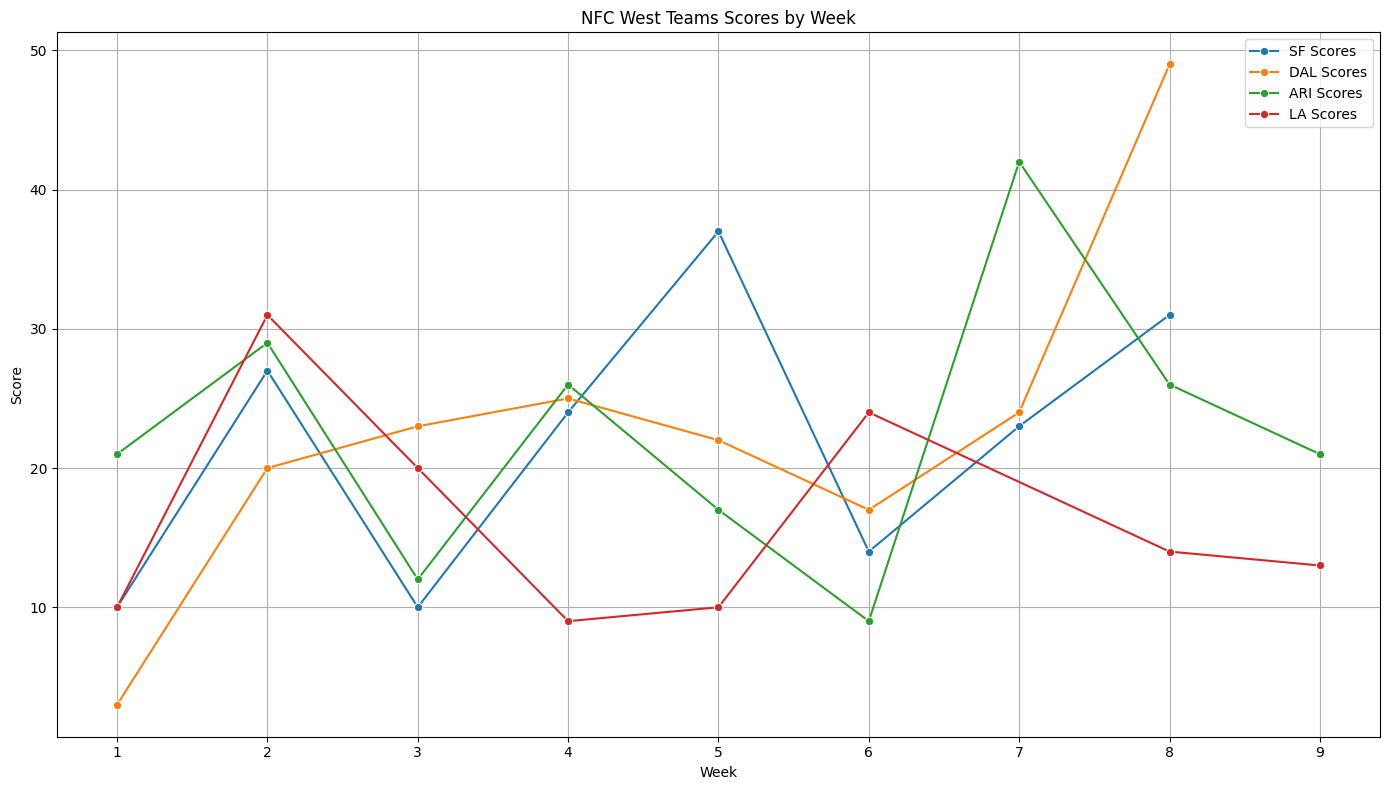

In [22]:
teams_list = ['SF', 'DAL', 'ARI', 'LA']
plt.figure(figsize=(14, 8))

for team in teams_list:
        # Filter the data for home and away games for the team
        team_home_games = games_df[games_df['homeTeamAbbr'] == team]
        team_away_games = games_df[games_df['visitorTeamAbbr'] == team]

        # Combine home and away scores into one DataFrame
        team_scores = pd.concat([
            team_home_games[['week', 'homeFinalScore']].rename(columns={'homeFinalScore': 'score'}),
            team_away_games[['week', 'visitorFinalScore']].rename(columns={'visitorFinalScore': 'score'})
        ])

        # Sort the scores by week
        team_scores.sort_values('week', inplace=True)

        # Plot the scores for the team
        sns.lineplot(data=team_scores, x='week', y='score', marker='o', label=f'{team} Scores')

plt.title('NFC West Teams Scores by Week')
plt.xlabel('Week')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### We can see that San Francisco and Dallas both finished the season strong, while Arizona and Los Angeles did not.

# Players

### The NFL has A LOT of players. Each roster consists of 52 players. Amongst these players, most play different positions. Let's find out which position has the most players in the NFL. Let's also see what percent of the NFL is made up of players who play that position. 

In [23]:
position_counts = players_df['position'].value_counts()

# Create a pie chart
fig = px.pie(names=position_counts.index, values=position_counts.values, title='Distribution of NFL Players by Position')

fig.show()

#### 13% of the NFL is made up of players who play the Wide Receiver position. Next, we have the Cornerback position, which makes up 11% of the NFL. Finally, Offensive Line Backers, who make up 8 percent of the NFL.

### The players NFL come from many different backgrounds. In our dataset, we see what college players come from. Let's find out which college has the most players in the NFL.

In [24]:
college_counts = players_df['collegeName'].value_counts()

# Create a bar chart for colleges
fig = px.bar(x=college_counts.index, y=college_counts.values, labels={'x': 'College Name', 'y': 'Number of Players'}, title='Distribution of NFL Players by College')

fig.update_layout(xaxis={'categoryorder':'total descending'})

fig.show()

#### Alabama has by far the most representation in the NFL

### Different colleges specialize in producing different talents. This is due to the college's coaching staff, and reputation for developing certain types of players. Let's find out which college has produced which type of player the most.

In [25]:
pivot_table = players_df.groupby(['collegeName', 'position']).size().unstack(fill_value=0)

# Generate a heatmap
fig = px.imshow(pivot_table, 
                labels=dict(x="Position", y="College Name", color="Count"),
                x=pivot_table.columns, 
                y=pivot_table.index,
                title="Frequency of Positions by College")

fig.update_xaxes(title="Position")
fig.update_yaxes(title="College Name")

fig.show()

#### Sometimes, all the data is too much data. In these scenarios, it best to trim to data, to make it easier to visualize. Data Sceintists must make the choice of which way is the best to way to manipulate the data.

In [26]:
# Identify the top 10 colleges by frequency
top_10_colleges = players_df['collegeName'].value_counts().head(10).index

# Filter the dataset for these top 10 colleges only
filtered_df = players_df[players_df['collegeName'].isin(top_10_colleges)]

# Pivot table to count the number of occurrences of each position from the top 10 colleges
pivot_table = filtered_df.groupby(['collegeName', 'position']).size().unstack(fill_value=0)

# Generate a heatmap with Plotly
fig = px.imshow(pivot_table,
                labels=dict(x="Position", y="College", color="Count"),
                x=pivot_table.columns,
                y=pivot_table.index,
                title="Top 10 Colleges: Frequency of Positions Produced")

# Show the plot
fig.show()

#### From trimming to the top 10 most colleges, we get a much clearer picture. We can see that Alabama has produced many more Defensive Tackles than other positions. A school like Florida, however, has produced much more of a mixed bag.

# Tackles

### Tackles are a very important part of the game of football. They are the last line of defense, and are responsible for stopping the opposing team from scoring. Say we are the general manager of a team with one of the worst defenses in the league. We want to find out which players are the best at tackling, so we can sign them to our team. 

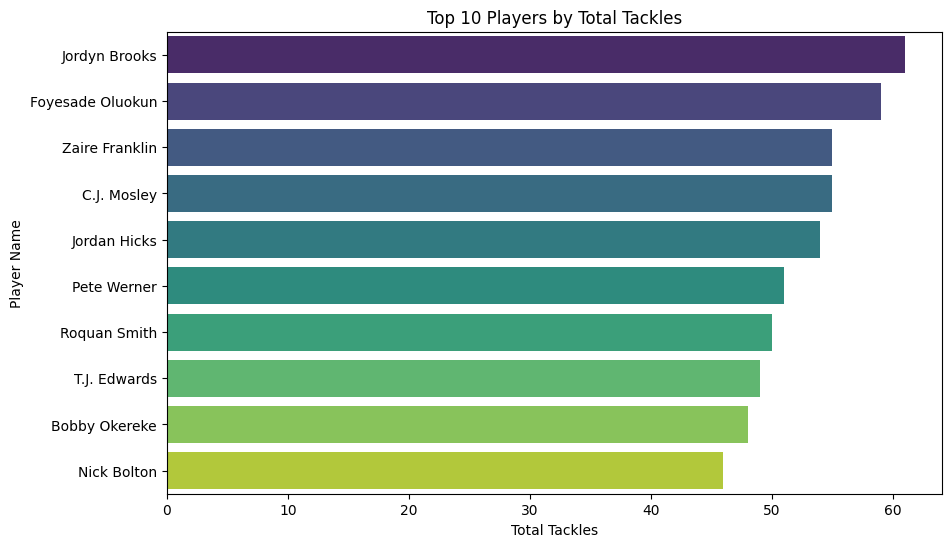

In [27]:
# Aggregate the total tackles by player
total_tackles_by_player = tackles_df.groupby('nflId')['tackle'].sum().reset_index()

# Sort by total tackles in descending order and select the top 10
top_tacklers = total_tackles_by_player.sort_values(by='tackle', ascending=False).head(10)

merged_df = pd.merge(top_tacklers, players_df, on='nflId', how='left')

plt.figure(figsize=(10, 6))
sns.barplot(x='tackle', y='displayName', data=merged_df, orient='h', palette='viridis')
plt.xlabel('Total Tackles')
plt.ylabel('Player Name')
plt.title('Top 10 Players by Total Tackles')
plt.show()

### From our horizontal bar chart, we can see that Jordyn Brooks has the most tackles in the NFL, followed closely by Foyesade Oluokun. However, one stat may not always tell the whole story. Oftentimes, players can also assist in tackles, which is also a very important part of the game. Let's find out which players have the most tackles and assists combined. They might be a more well rounded fit for our team.

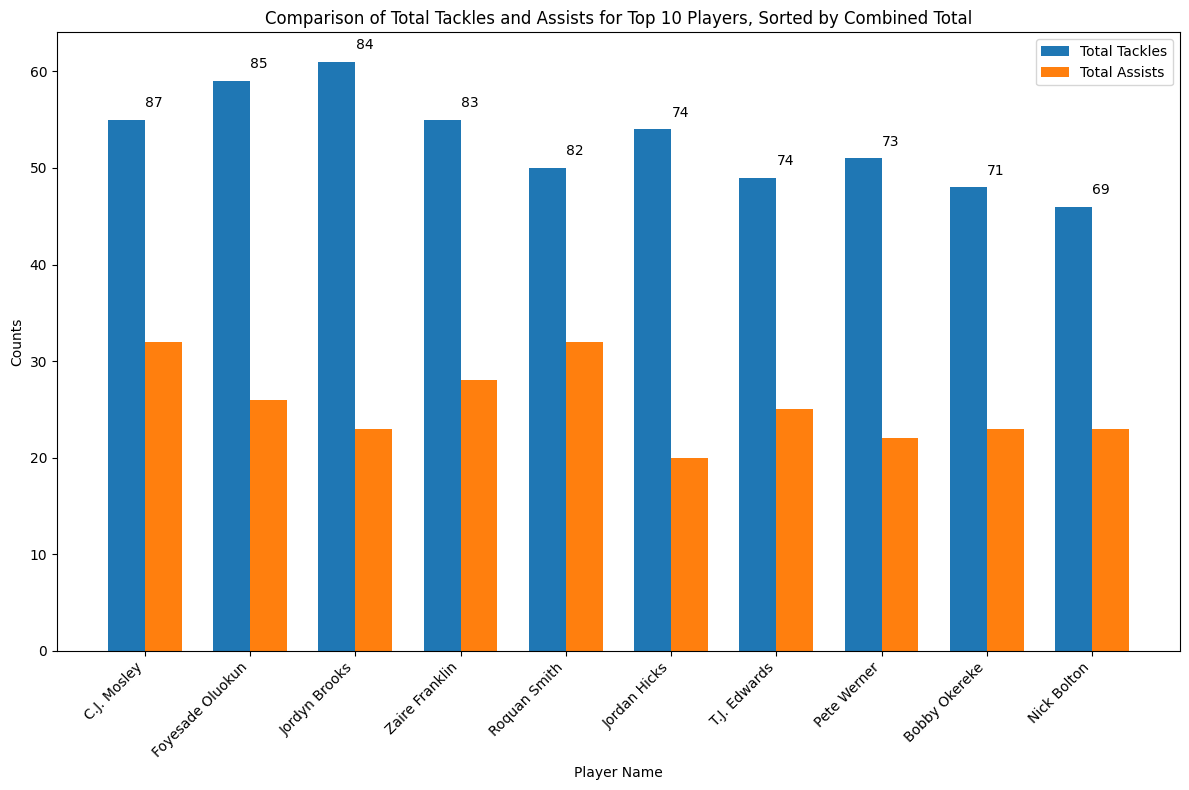

In [33]:
# Aggregate the total tackles and assists by player
tackles_assists_by_player = tackles_df.groupby('nflId').agg(total_tackles=('tackle', 'sum'), total_assists=('assist', 'sum')).reset_index()

# Sort by total tackles in descending order for consistency and select the top 10 (for visualization purposes)
tackles_assists_top = tackles_assists_by_player.sort_values(by='total_tackles', ascending=False).head(10)

# Merge to include player names for the top tacklers and assisters
tackles_assists_merged = pd.merge(tackles_assists_top, players_df[['nflId', 'displayName']], on='nflId', how='left')

# Add a new column for the sum of tackles and assists
tackles_assists_merged['total_sum'] = tackles_assists_merged['total_tackles'] + tackles_assists_merged['total_assists']

# Sort the DataFrame by the new total_sum column in descending order
tackles_assists_merged_sorted = tackles_assists_merged.sort_values(by='total_sum', ascending=False)

plt.figure(figsize=(12, 8))
bar_width = 0.35
index = np.arange(len(tackles_assists_merged_sorted))

bars1 = plt.bar(index, tackles_assists_merged_sorted['total_tackles'], bar_width, label='Total Tackles')
bars2 = plt.bar(index + bar_width, tackles_assists_merged_sorted['total_assists'], bar_width, label='Total Assists')

plt.xlabel('Player Name')
plt.ylabel('Counts')
plt.title('Comparison of Total Tackles and Assists for Top 10 Players, Sorted by Combined Total')
plt.xticks(index + bar_width / 2, tackles_assists_merged_sorted['displayName'], rotation=45, ha="right")

# Annotate sum of tackles and assists, centered over both bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    total = tackles_assists_merged_sorted.iloc[i]['total_sum']
    # Calculate midpoint for the text
    midpoint = bar1.get_x() + bar1.get_width() + (bar_width / 2) / 2
    height = max(bar1.get_height(), bar2.get_height())
    plt.text(midpoint, height + 1, f'{total}', ha='center', va='bottom')

plt.legend()
plt.tight_layout()
plt.show()



#### From our plot, we can see that C.J Mosley has the most tackles and assists combined. He is followed closely by Foyesade Oluokun, who we saw earlier had the second most tackles in the NFL. C.J Mosley might the best fit for our team, as he provides a good balance of tackles and assists.

# Plays

### Suppose you are a brand new coach in the NFL, and you need some reference of which plays/formations to use and when. Your biggest weakness as a coach is this. You never know when to run the ball, or when to pass the ball on offense. On defense, you don't understand when to blitz, or when to play coverage. Let's create something that can help you understand the big picture.

In [38]:
fig = px.scatter(plays_df, x='passProbability', y='playResult', color='offenseFormation',
             facet_col='down', title='Formation Usage vs. Play Success on Different Downs')

fig.show()

#### Let's represent this relationship another way. Let's also add an interactive element to our plot. This way, we can see exactly what plays were run at what down, and what yardage. This way, we can see the big picture, and the small picture at the same time.

In [29]:
# Create a 3D scatter plot
fig = px.scatter_3d(plays_df, 
                    x='yardsToGo', 
                    y='down', 
                    z='passProbability',
                    color='playResult', 
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title='3D Visualization of Plays',
                    hover_data=['playDescription']
                    )

fig.update_layout(scene=dict(
    yaxis=dict(
        dtick=1  # Set the interval for the y-axis
    )
))

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

fig.show()